In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_text = pd.read_csv("../csv/jago_preprocessing_id.csv")

# Load tanggal dari raw data
df_raw = pd.read_csv("../csv/jago_reviews_raw.csv", usecols=["reviewId", "at"])
df_text = df_text.merge(df_raw, on="reviewId", how="left")
df_text["at"] = pd.to_datetime(df_text["at"])

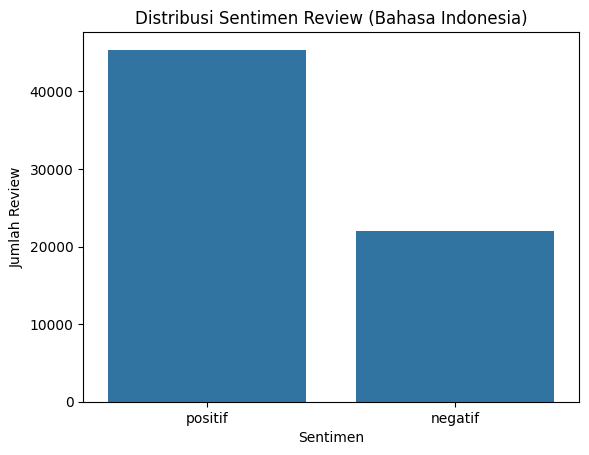

In [11]:
sns.countplot(data=df_text, x="sentiment")
plt.title("Distribusi Sentimen Review (Bahasa Indonesia)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.show()

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/2553501536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_text, x="score", palette="Blues")


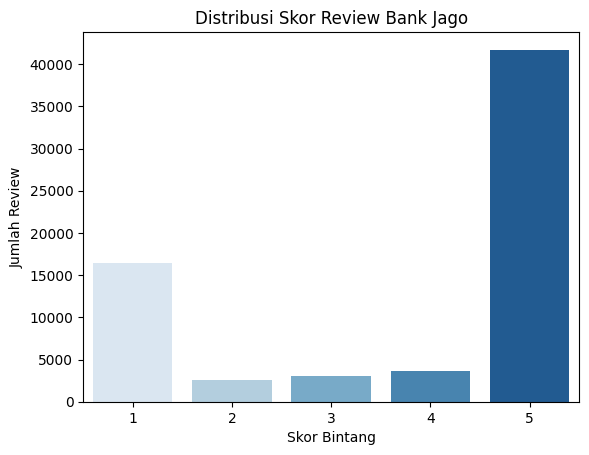

In [12]:
# Distribusi skor bintang
sns.countplot(data=df_text, x="score", palette="Blues")
plt.title("Distribusi Skor Review Bank Jago")
plt.xlabel("Skor Bintang")
plt.ylabel("Jumlah Review")
plt.show()

<Figure size 1000x500 with 0 Axes>

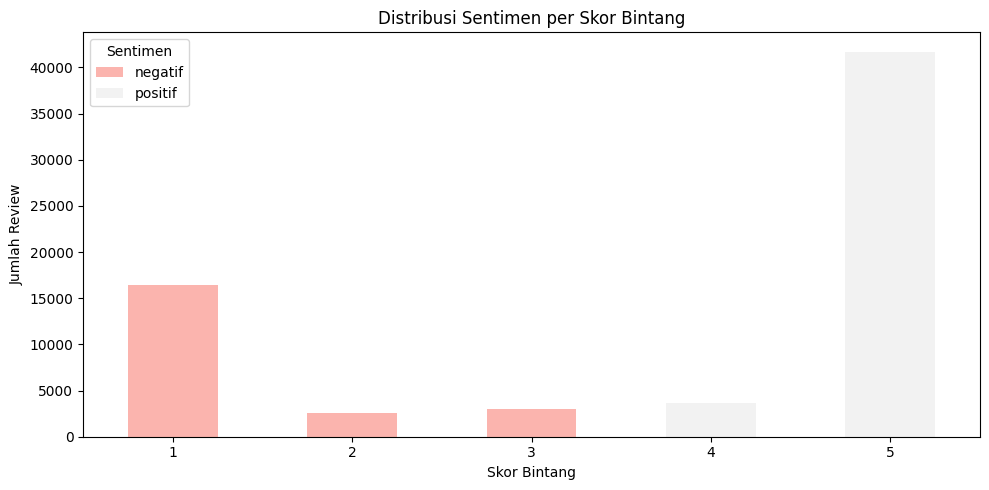

In [13]:
plt.figure(figsize=(10, 5))
ct = pd.crosstab(df_text["score"], df_text["sentiment"])
ct.plot(kind="bar", stacked=True, colormap="Pastel1", figsize=(10, 5))
plt.title("Distribusi Sentimen per Skor Bintang")
plt.xlabel("Skor Bintang")
plt.ylabel("Jumlah Review")
plt.xticks(rotation=0)
plt.legend(title="Sentimen")
plt.tight_layout()
plt.show()

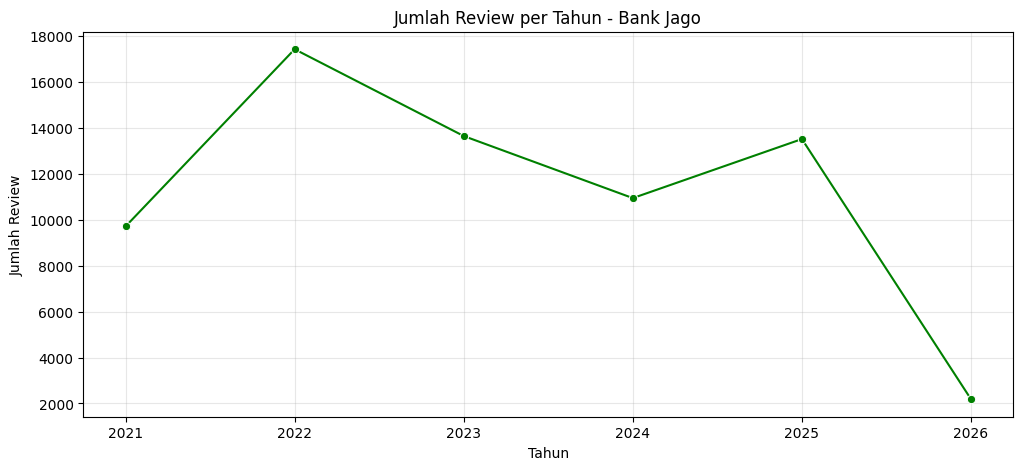

In [14]:
df_text["year"] = df_text["at"].dt.year

# Jumlah review per tahun
year_counts = df_text["year"].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="green")
plt.title("Jumlah Review per Tahun - Bank Jago")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Review")
plt.grid(True, alpha=0.3)
plt.show()

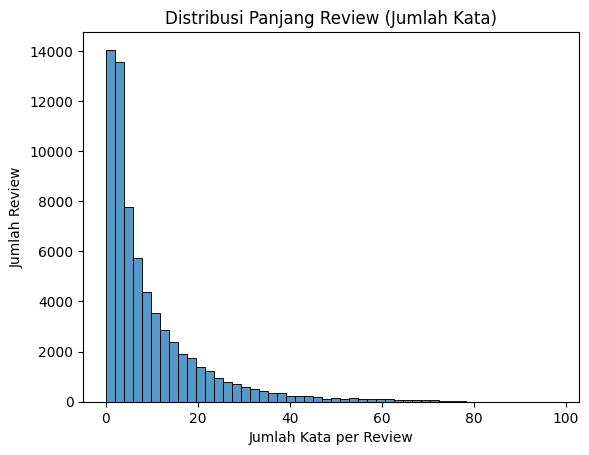

In [15]:
df_text["review_length"] = df_text["clean_text"].fillna("").str.split().apply(len)

sns.histplot(df_text["review_length"], bins=50)
plt.title("Distribusi Panjang Review (Jumlah Kata)")
plt.xlabel("Jumlah Kata per Review")
plt.ylabel("Jumlah Review")
plt.show()

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/750734824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_length, x="sentiment", y="review_length", palette="pastel")


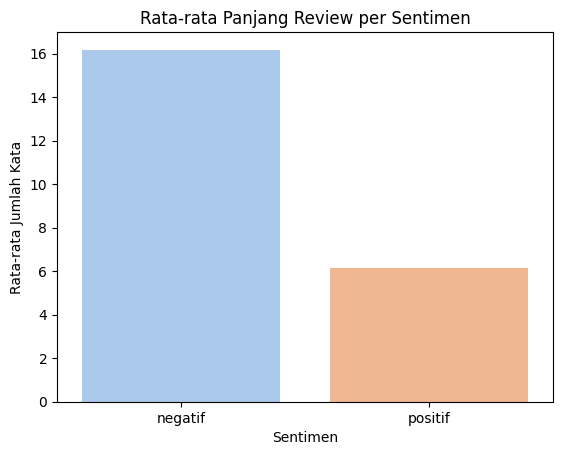

In [16]:
avg_length = df_text.groupby("sentiment")["review_length"].mean().reset_index()
sns.barplot(data=avg_length, x="sentiment", y="review_length", palette="pastel")
plt.title("Rata-rata Panjang Review per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Rata-rata Jumlah Kata")
plt.show()


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


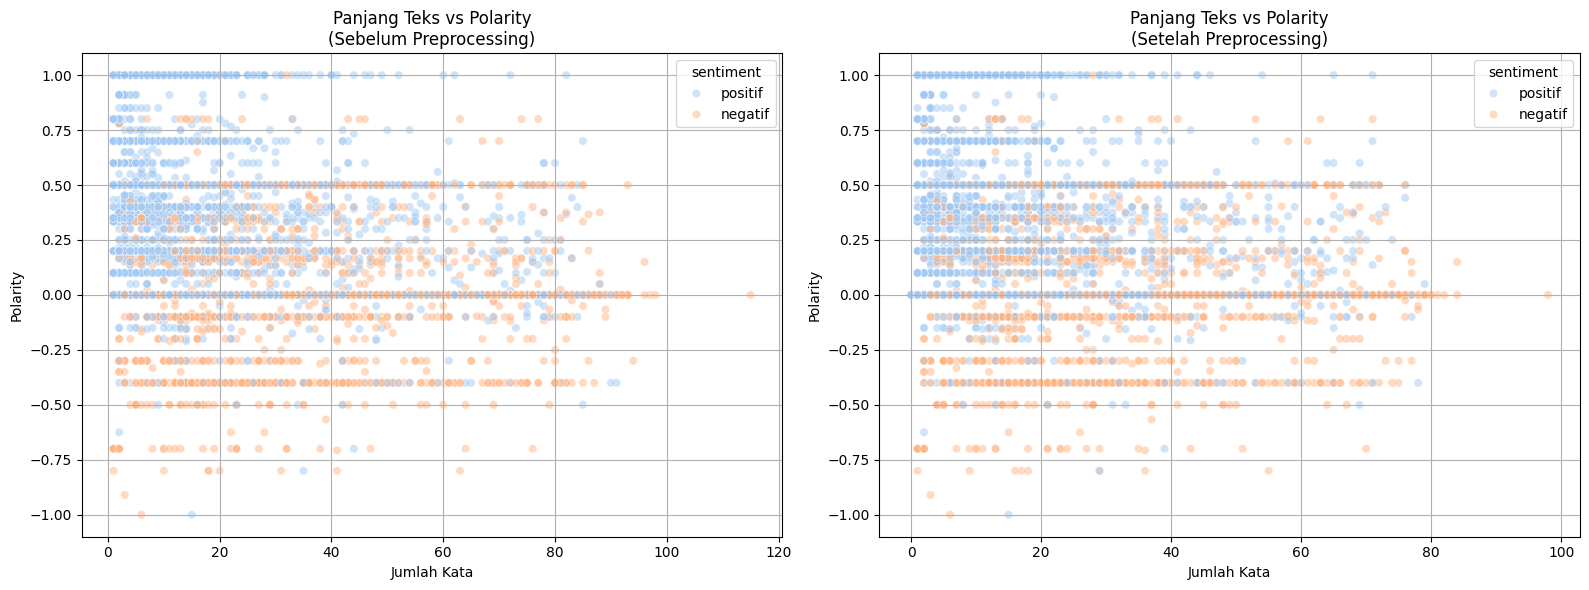

In [17]:
!pip install textblob

from textblob import TextBlob

df_text["original_length"] = df_text["content"].fillna("").str.split().apply(len)
df_text["clean_length"] = df_text["clean_text"].fillna("").str.split().apply(len)
df_text["polarity"] = df_text["clean_text"].fillna("").apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=df_text, ax=axes[0],
    x="original_length", y="polarity",
    hue="sentiment", palette="pastel", alpha=0.5)
axes[0].set_title("Panjang Teks vs Polarity\n(Sebelum Preprocessing)")
axes[0].set_xlabel("Jumlah Kata")
axes[0].set_ylabel("Polarity")
axes[0].grid(True)

sns.scatterplot(data=df_text, ax=axes[1],
    x="clean_length", y="polarity",
    hue="sentiment", palette="pastel", alpha=0.5)
axes[1].set_title("Panjang Teks vs Polarity\n(Setelah Preprocessing)")
axes[1].set_xlabel("Jumlah Kata")
axes[1].set_ylabel("Polarity")
axes[1].grid(True)

plt.tight_layout()
plt.show()

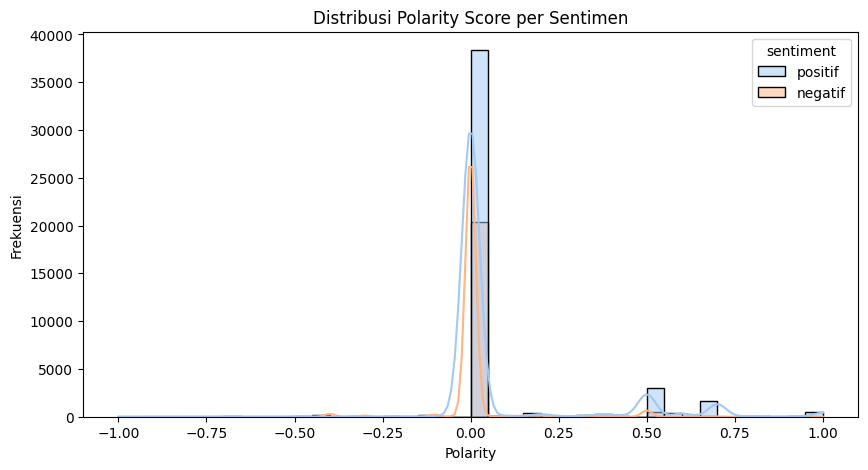

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_text, x="polarity", hue="sentiment",
             bins=40, kde=True, palette="pastel")
plt.title("Distribusi Polarity Score per Sentimen")
plt.xlabel("Polarity")
plt.ylabel("Frekuensi")
plt.show()

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/595907437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_text, x="sentiment", y="score", palette="pastel")


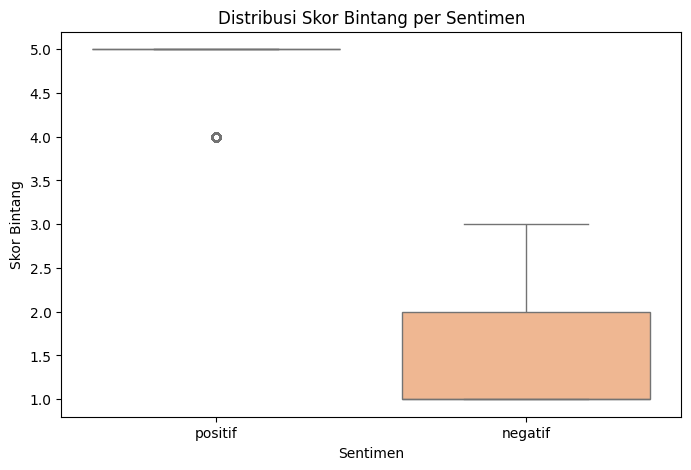

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_text, x="sentiment", y="score", palette="pastel")
plt.title("Distribusi Skor Bintang per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Skor Bintang")
plt.show()

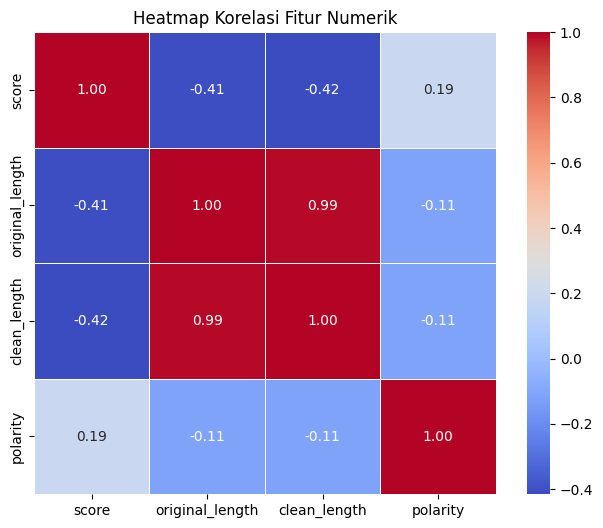

In [20]:
# Kolom numerik yang relevan
num_cols = ["score", "original_length", "clean_length", "polarity"]
corr = df_text[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [21]:
from collections import Counter
import ast

# Kalau kolom tokens tersimpan sebagai string di CSV, ubah jadi list dulu
df_text["tokens"] = df_text["tokens"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Pisahkan token review negatif dan positif
neg_tokens = df_text[df_text["sentiment"] == "negatif"]["tokens"].sum()
pos_tokens = df_text[df_text["sentiment"] == "positif"]["tokens"].sum()

# Hitung 20 kata paling sering
top_neg = Counter(neg_tokens).most_common(20)
top_pos = Counter(pos_tokens).most_common(20)


/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/974945018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_neg), y=list(words_neg), palette="Reds_r")


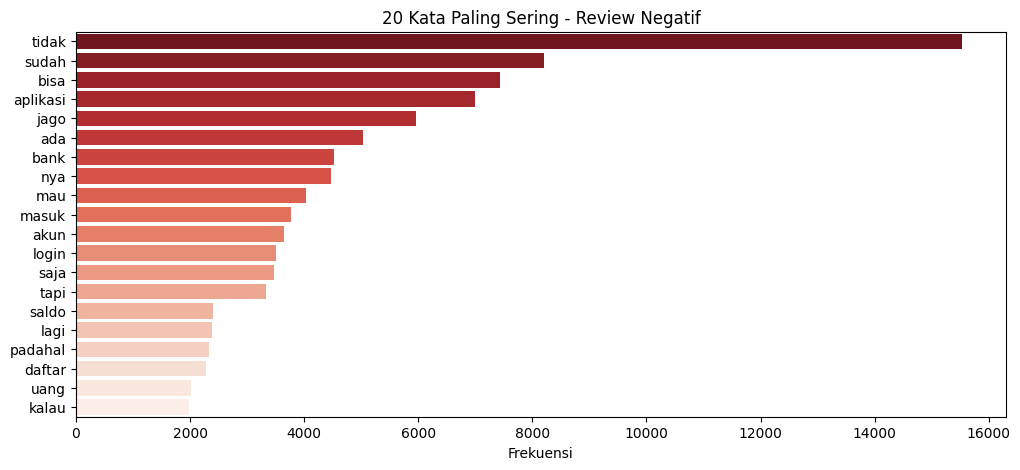

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/974945018.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts_pos), y=list(words_pos), palette="Blues_r")


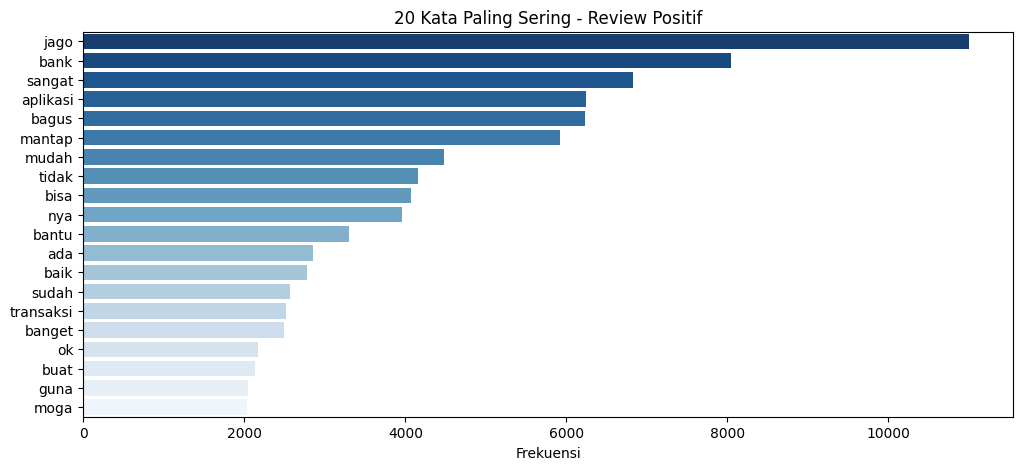

In [22]:
# Bar chart kata paling sering - NEGATIF
words_neg, counts_neg = zip(*top_neg)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(counts_neg), y=list(words_neg), palette="Reds_r")
plt.title("20 Kata Paling Sering - Review Negatif")
plt.xlabel("Frekuensi")
plt.show()

# Bar chart kata paling sering - POSITIF
words_pos, counts_pos = zip(*top_pos)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(counts_pos), y=list(words_pos), palette="Blues_r")
plt.title("20 Kata Paling Sering - Review Positif")
plt.xlabel("Frekuensi")
plt.show()


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


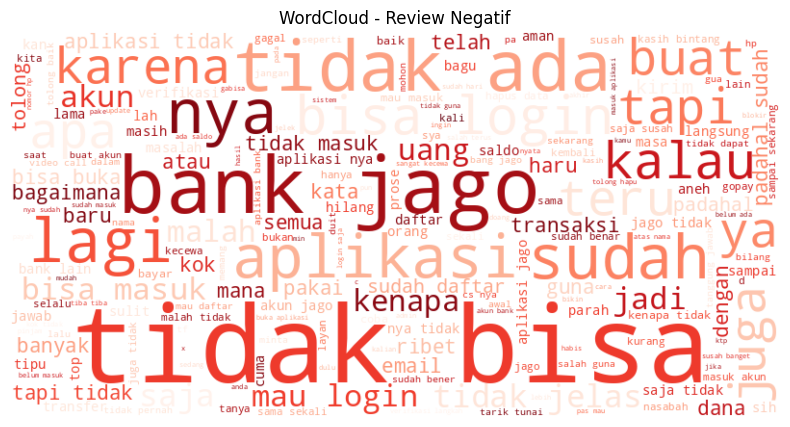

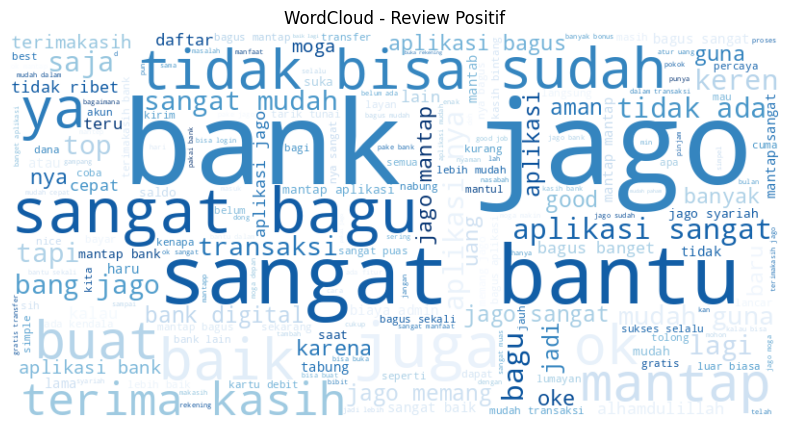

In [23]:
!pip install wordcloud

from wordcloud import WordCloud

# WordCloud negatif
neg_text = " ".join(neg_tokens)
wc_neg = WordCloud(width=800, height=400, background_color="white",
                   colormap="Reds").generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Review Negatif")
plt.show()

# WordCloud positif
pos_text = " ".join(pos_tokens)
wc_pos = WordCloud(width=800, height=400, background_color="white",
                   colormap="Blues").generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Review Positif")
plt.show()

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/622828573.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bg_counts), y=list(bg_words), palette="Blues_r")


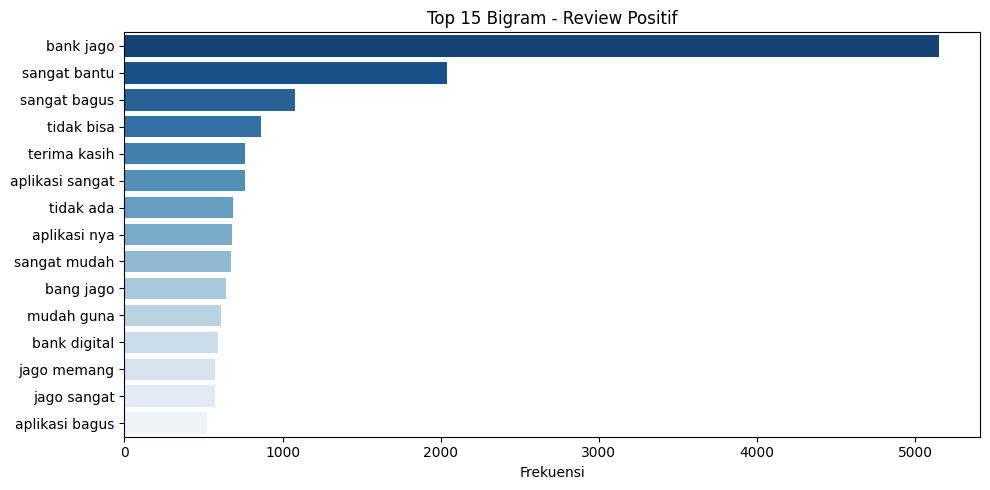

/var/folders/gv/5qzn9vj14kvdh1g_x1w_10j80000gn/T/ipykernel_47096/622828573.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bg_counts_n), y=list(bg_words_n), palette="Reds_r")


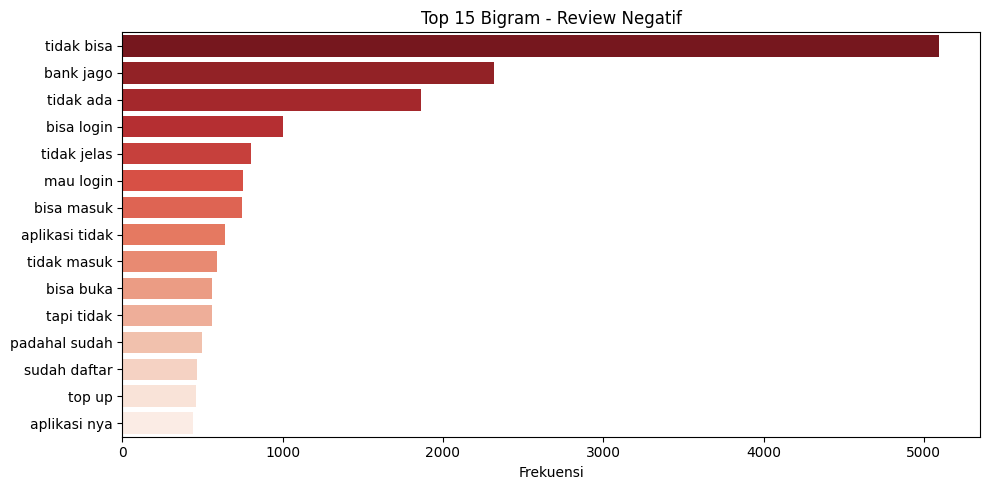

In [24]:
from nltk import bigrams
from collections import Counter

# Bigram Positif
pos_bigrams = list(bigrams(pos_tokens))
top_pos_bigrams = Counter(pos_bigrams).most_common(15)
bg_words, bg_counts = zip(*[(" ".join(b), c) for b, c in top_pos_bigrams])

plt.figure(figsize=(10, 5))
sns.barplot(x=list(bg_counts), y=list(bg_words), palette="Blues_r")
plt.title("Top 15 Bigram - Review Positif")
plt.xlabel("Frekuensi")
plt.tight_layout()
plt.show()

# Bigram Negatif
neg_bigrams = list(bigrams(neg_tokens))
top_neg_bigrams = Counter(neg_bigrams).most_common(15)
bg_words_n, bg_counts_n = zip(*[(" ".join(b), c) for b, c in top_neg_bigrams])

plt.figure(figsize=(10, 5))
sns.barplot(x=list(bg_counts_n), y=list(bg_words_n), palette="Reds_r")
plt.title("Top 15 Bigram - Review Negatif")
plt.xlabel("Frekuensi")
plt.tight_layout()
plt.show()